In [1]:
from astropy.io import fits

In [4]:
hdul = fits.open("gs20201102_78_850_mf_crop.fit")

In [7]:
hdul.info()

Filename: gs20201102_78_850_mf_crop.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     363   (211, 210, 1)   float64   
  1  VARIANCE      1 ImageHDU        48   (211, 210, 1)   float64   


In [14]:
data = hdul[1].data

In [12]:
import matplotlib.pyplot as plt

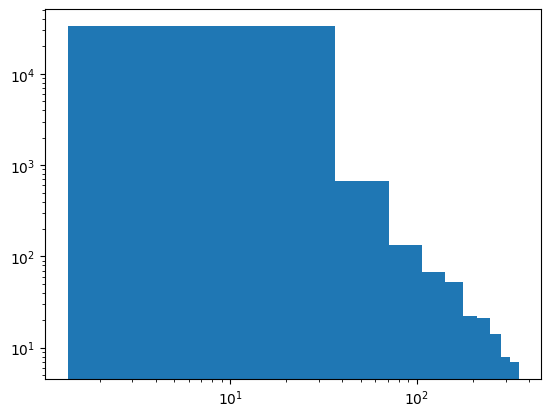

In [19]:
plt.hist(data.flatten())
plt.xscale('log')
plt.yscale('log')

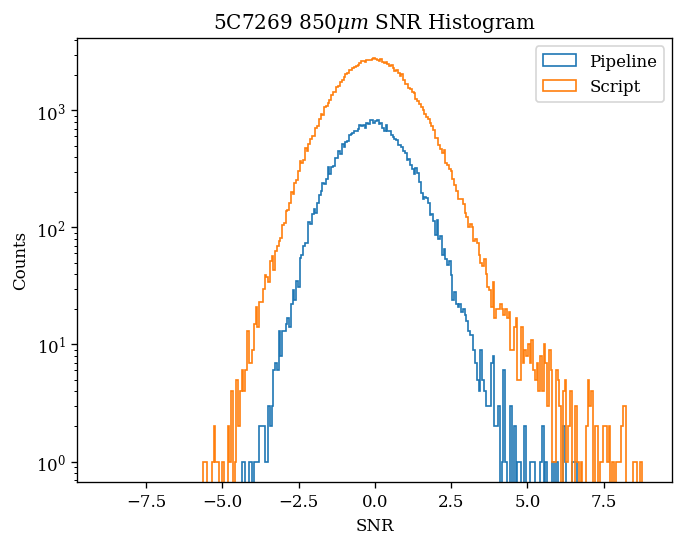

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

plt.rcParams['font.family'] = 'serif'
plt.rcParams["mathtext.fontset"] = "dejavuserif"

source_name = '5C7269'
wav = '850'
n = 250

snr = fits.open('gs20201102_78_850_snr_crop.fit')[0].data[0].flatten()
jks = fits.open('5C7-269_850_crop_mf_cal_snr.fits')[0].data[0].flatten()
snr = snr[~np.isnan(snr)]
jks = jks[~np.isnan(jks)]

rang = np.hstack([snr,jks])
rang = np.nanmin(rang),np.nanmax(rang)

fig,ax = plt.subplots(dpi=120)


s = ax.hist(snr,range=rang,bins=n,histtype='step',label='Pipeline')
ax.hist(jks,range=rang,bins=n,histtype='step',label='Script')
ax.set_xlabel('SNR')
ax.set_xlim(-max(s[1])-1,max(s[1])+1)
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.set_title(rf'{source_name} ${wav}\mu m$ SNR Histogram')
ax.legend()

#plt.savefig(f'{source_name}_{wav}_flux dist.png')
plt.show()


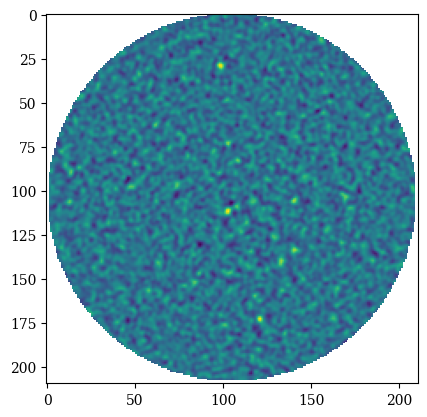

In [5]:
plt.imshow(fits.open('gs20201102_78_850_snr_crop.fit')[0].data[0])

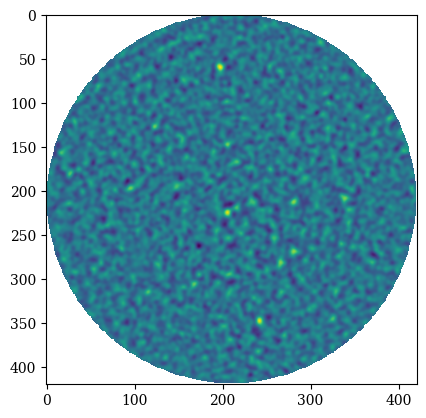

In [6]:
plt.imshow(fits.open('5C7-269_850_crop_mf_cal_snr.fits')[0].data[0])